### Categorical Variables

The following variables in the data set are categorical.

* MSSubClass
* MSZoning
* Street
* Alley
* LotShape
* LandContour
* Utilities
* LotConfig
* LandSlope
* Neighborhood
* Condition1
* Condition2
* BldgType
* HouseStyle
* OverallQual
* OverallCond
* RoofStyle
* RoofMatl
* Exterior1st
* Exterior2nd
* MasVnrType
* ExterQual
* ExterCond
* Foundation
* BsmtQual
* BsmtCond
* BsmtExposure
* BsmtFinType1
* BsmtFinType2
* Heating
* HeatingQC
* CentralAir
* Electrical
* BsmtFullBath
* BsmtHalfBath
* FullBath
* HalfBath 
* BedroomAbvGr
* KitchenAbvGr
* Functional
* Fireplaces
* GarageType
* GarageFinish
* GarageCars
* GarageQual
* GarageCond
* PavedDrive
* PoolQC
* Fence
* MiscFeature
* SaleType
* SaleCondition

Some of these, as with the numerical variables, have been previously analyzed above, and will not be given specific consideration here. 

Many off the categorical variables have levels which are notably underrepresented in the data set. These should be collapsed, and then the new levels should be compared to review if they are significantly different from one another. 

### Imports

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

### Data

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

#### Copying alterations from main Exploratory file

In [3]:
#Dropping those properties with above ground living area
#greater than 4000
index_drop = train[train["GrLivArea"] > 4000].index
train.drop(index = index_drop, inplace = True)
train.reset_index(drop = True, inplace = True)

In [4]:
#Merging 4 and 3 car garage levels
train.loc[train["GarageCars"] == 4, "GarageCars"] = 3

In [5]:
#Merging 0 and 1 full bath levels
train.loc[train["FullBath"] == 0, "FullBath"] = 1

In [6]:
#Merging all levels of total above ground rooms less than three into one
train.loc[train["TotRmsAbvGrd"] < 3, "TotRmsAbvGrd"] = 3
#merging all levels of total above ground rooms greater than 10 into one
train.loc[train["TotRmsAbvGrd"] >= 10, "TotRmsAbvGrd"] = 10

#### MSSubClass

Text(0.5, 1.0, 'Interaction between the type of Property being sold and the Sales Price')

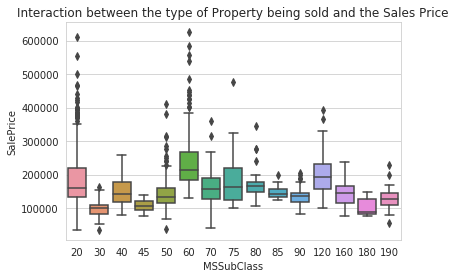

In [7]:
#Visualization of MSSubclass vs SalePrice
sns.boxplot(train["MSSubClass"], train["SalePrice"])
plt.title("Interaction between the type of Property being sold and the Sales Price")

In [8]:
train["SalePrice"].groupby(train["MSSubClass"]).describe()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,,,,,,,,
20,536.0,185224.811567,78782.189967,35311.0,132500.0,159250.0,220000.0,611657.0
30,69.0,95829.724638,24857.110083,34900.0,81000.0,99900.0,110500.0,163500.0
40,4.0,156125.000000,75747.799748,79500.0,119625.0,142500.0,179000.0,260000.0
45,12.0,108591.666667,20231.723889,76000.0,94125.0,107500.0,122250.0,139400.0
50,144.0,143302.972222,54851.983707,37900.0,114125.0,132000.0,159000.0,410000.0
60,295.0,236948.650847,76072.460219,129000.0,185000.0,215200.0,267500.0,625000.0
70,60.0,166772.416667,58206.545762,40000.0,128000.0,156000.0,189500.0,359100.0
75,16.0,192437.500000,100556.762577,101000.0,125625.0,163500.0,219625.0,475000.0
80,58.0,169736.551724,38197.808771,107000.0,147250.0,166500.0,179425.0,345000.0


Since there are multiple levels which do not seem to be significantly different from one another with regard to the sle price, I'll be checking if they are truely different using a student t test. Any levels that don't significantly differ from one another can be collapsed, to reduce the chance of overfitting.

In [9]:
print(stats.ttest_ind(train[train["MSSubClass"] == 160]["SalePrice"], train[train["MSSubClass"] == 190]["SalePrice"]))
print("\nSince the '160' and '190' levels are not significantly different, they will be collapsed.")

Ttest_indResult(statistic=1.1682338291160688, pvalue=0.24576398311578165)

Since the '160' and '190' levels are not significantly different, they will be collapsed.


In [10]:
train.loc[train["MSSubClass"] == 160, "MSSubClass"] = 1
train.loc[train["MSSubClass"] == 190, "MSSubClass"] = 1

In [11]:
print(stats.ttest_ind(train[train["MSSubClass"] == 1]["SalePrice"], train[train["MSSubClass"] == 90]["SalePrice"]))
print("\nThe '90' level is also not significantly different from the '160/190' (ie level 1) level, it will be collapsed into the same level.")

Ttest_indResult(statistic=0.38860427759944455, pvalue=0.6981468748074335)

The '90' level is also not significantly different from the '160/190' (ie level 1) level, it will be collapsed into the same level.


In [12]:
train.loc[train["MSSubClass"] == 90, "MSSubClass"] = 1

In [13]:
print(stats.ttest_ind(train[train["MSSubClass"] == 1]["SalePrice"], train[train["MSSubClass"] == 50]["SalePrice"]))
print("\nThe '50' level is also not significantly different from the '90/160/190' (ie level 1) level, it will be collapsed into the same level.")

Ttest_indResult(statistic=-1.5769832416577885, pvalue=0.11590095685810027)

The '50' level is also not significantly different from the '90/160/190' (ie level 1) level, it will be collapsed into the same level.


In [14]:
train.loc[train["MSSubClass"] == 50, "MSSubClass"] = 1

In [15]:
print(stats.ttest_ind(train[train["MSSubClass"] == 1]["SalePrice"], train[train["MSSubClass"] == 85]["SalePrice"]))
print("\nThe '85' level is also not significantly different from the '50/90/160/190' (ie level 1) level, it will be collapsed into the same level.")

Ttest_indResult(statistic=-0.8549810541497775, pvalue=0.3932283600007703)

The '85' level is also not significantly different from the '50/90/160/190' (ie level 1) level, it will be collapsed into the same level.


In [16]:
train.loc[train["MSSubClass"] == 85, "MSSubClass"] = 1

In [17]:
print(stats.ttest_ind(train[train["MSSubClass"] == 1]["SalePrice"], train[train["MSSubClass"] == 40]["SalePrice"]))
print("\nThe '40' level is also not significantly different from the '85/50/90/160/190' (ie level 1) level, it will be collapsed into the same level.")

Ttest_indResult(statistic=-0.7362594107484116, pvalue=0.4621278140199456)

The '40' level is also not significantly different from the '85/50/90/160/190' (ie level 1) level, it will be collapsed into the same level.


In [18]:
train.loc[train["MSSubClass"] == 40, "MSSubClass"] = 1

In [19]:
print(stats.ttest_ind(train[train["MSSubClass"] == 1]["SalePrice"], train[train["MSSubClass"] == 70]["SalePrice"]))
print("\nThe '70' level is significantly different from the '40/85/50/90/160/190' (ie level 1) level, it will not be collapsed. I'll now check the closest level less than the '85/50/90/160/190' level.")

Ttest_indResult(statistic=-4.072883487312373, pvalue=5.680053561088827e-05)

The '70' level is significantly different from the '40/85/50/90/160/190' (ie level 1) level, it will not be collapsed. I'll now check the closest level less than the '85/50/90/160/190' level.


In [20]:
print(stats.ttest_ind(train[train["MSSubClass"] == 1]["SalePrice"], train[train["MSSubClass"] == 45]["SalePrice"]))
print("\nThe '45' level is significantly different from the '40/85/50/90/160/190' (ie level 1) level, it will not be collapsed into the same level.")

Ttest_indResult(statistic=2.4305557785038943, pvalue=0.015619729299207167)

The '45' level is significantly different from the '40/85/50/90/160/190' (ie level 1) level, it will not be collapsed into the same level.


In [21]:
print(stats.ttest_ind(train[train["MSSubClass"] == 75]["SalePrice"], train[train["MSSubClass"] == 70]["SalePrice"]))
print("\nThe levels 70 and 75 are not statistically significantly different when comparing their average sales price. As such, they will be combined in to a new level: level 2")

Ttest_indResult(statistic=1.323376061002872, pvalue=0.1897846257357102)

The levels 70 and 75 are not statistically significantly different when comparing their average sales price. As such, they will be combined in to a new level: level 2


In [22]:
train.loc[train["MSSubClass"] == 75, "MSSubClass"] = 2
train.loc[train["MSSubClass"] == 70, "MSSubClass"] = 2

In [23]:
print(stats.ttest_ind(train[train["MSSubClass"] == 2]["SalePrice"], train[train["MSSubClass"] == 80]["SalePrice"]))
print("\nLevel 80 is not significantly different from the '70/75' level (ie level 2), and will be collapsed.")

Ttest_indResult(statistic=0.24146030252617667, pvalue=0.8095730670278842)

Level 80 is not significantly different from the '70/75' level (ie level 2), and will be collapsed.


In [24]:
train.loc[train["MSSubClass"] == 80, "MSSubClass"] = 2

In [25]:
print(stats.ttest_ind(train[train["MSSubClass"] == 2]["SalePrice"], train[train["MSSubClass"] == 20]["SalePrice"]))
print("\nLevel 20 is not significantly different from the '80/70/75' level (ie level 2), and will be collapsed.")

Ttest_indResult(statistic=-1.9455533247668713, pvalue=0.05212753181364993)

Level 20 is not significantly different from the '80/70/75' level (ie level 2), and will be collapsed.


In [26]:
train.loc[train["MSSubClass"] == 20, "MSSubClass"] = 2

In [27]:
print(stats.ttest_ind(train[train["MSSubClass"] == 2]["SalePrice"], train[train["MSSubClass"] == 120]["SalePrice"]))
print("\nLevel 120 is significantly different from the '80/70/75' level (ie level 2), and will not be collapsed.")

Ttest_indResult(statistic=-2.194342910545449, pvalue=0.028514715650928394)

Level 120 is significantly different from the '80/70/75' level (ie level 2), and will not be collapsed.


In [28]:
print(stats.ttest_ind(train[train["MSSubClass"] == 45]["SalePrice"], train[train["MSSubClass"] == 180]["SalePrice"]))
print("\nLevel '45' and '180' are not significantly different when considering their interaction with the sales price, so the will be collasped into a new level: level '3'")

Ttest_indResult(statistic=0.5920172732891521, pvalue=0.5604727095507888)

Level '45' and '180' are not significantly different when considering their interaction with the sales price, so the will be collasped into a new level: level '3'


In [29]:
train.loc[train["MSSubClass"] == 45, "MSSubClass"] = 3
train.loc[train["MSSubClass"] == 180, "MSSubClass"] = 3

In [30]:
print(stats.ttest_ind(train[train["MSSubClass"] == 30]["SalePrice"], train[train["MSSubClass"] == 3]["SalePrice"]))
print("\nLevel '3' is not significantly different from the '180' level, and will be collapsed.")

Ttest_indResult(statistic=-1.6335384813800056, pvalue=0.10588864656472867)

Level '3' is not significantly different from the '180' level, and will be collapsed.


In [31]:
train.loc[train["MSSubClass"] == 30, "MSSubClass"] = 3

In [32]:
print(stats.ttest_ind(train[train["MSSubClass"] == 60]["SalePrice"], train[train["MSSubClass"] == 120]["SalePrice"]))
print("\nLevel '60' is significantly different from the '120', and will not be collapsed.")

Ttest_indResult(statistic=4.09384305380526, pvalue=5.1856584403524745e-05)

Level '60' is significantly different from the '120', and will not be collapsed.


Text(0.5, 1.0, 'Interaction between the type of Property being sold and the Sales Price - Updated Levels')

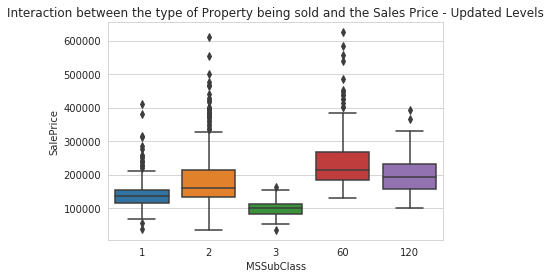

In [33]:
#Interaction of MSSubClass and SalePrice - Levvels collapsed
sns.boxplot(train["MSSubClass"], train["SalePrice"])
plt.title("Interaction between the type of Property being sold and the Sales Price - Updated Levels")

This is the result once I'm collapsed the statistically similar levels. This was done more as an excercise than anything else, and, as there are algorithms to handle level collapsing, I won't be doing this for any of the other categorical variables in this file.

#### MSZoning

Text(0.5, 1.0, 'Interaction of the Zoning Classification of the Property and the Sales Price')

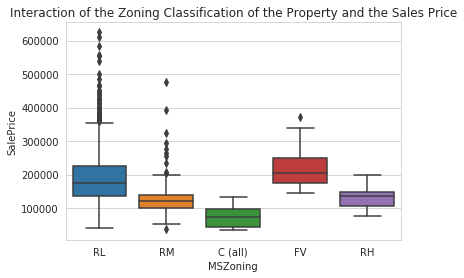

In [34]:
sns.boxplot(train["MSZoning"], train["SalePrice"])
plt.title("Interaction of the Zoning Classification of the Property and the Sales Price")

In [35]:
train["SalePrice"].groupby(train["MSZoning"]).describe()

,count,mean,std,min,25%,50%,75%,max
MSZoning,,,,,,,,
C (all),10.0,74528.000000,33791.092031,34900.0,43998.25,74700.0,98332.0,133900.0
FV,65.0,214014.061538,52369.662067,144152.0,174000.00,205950.0,250000.0,370878.0
RH,16.0,131558.375000,35714.118435,76000.0,106150.00,136500.0,148608.5,200000.0
RL,1147.0,190062.771578,77452.133607,39300.0,137500.00,174000.0,224250.0,625000.0
RM,218.0,126316.830275,48521.689833,37900.0,100000.00,120500.0,140000.0,475000.0


#### Street

Text(0.5, 1.0, 'Interaction between the Type of Road access to the Property and the Sales Price')

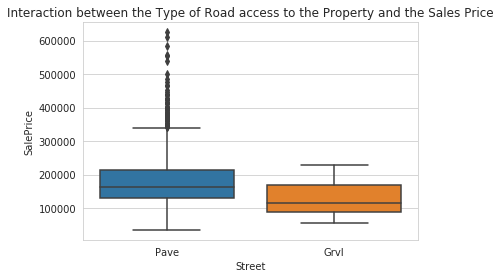

In [36]:
sns.boxplot(train["Street"], train["SalePrice"])
plt.title("Interaction between the Type of Road access to the Property and the Sales Price")

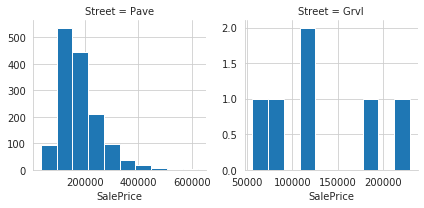

In [37]:
g = sns.FacetGrid(train, col = "Street", sharex = False, sharey = False)
g = g.map(plt.hist, "SalePrice")

In [38]:
train["SalePrice"].groupby(train["Street"]).describe()

,count,mean,std,min,25%,50%,75%,max
Street,,,,,,,,
Grvl,6.0,130190.500000,65446.253991,55993.0,88250.0,114250.0,169650.0,228950.0
Pave,1450.0,180357.967586,76691.372147,34900.0,130000.0,163000.0,214000.0,625000.0


In [39]:
stats.ttest_ind(train[train["Street"] == "Pave"]["SalePrice"], train[train["Street"] == "Grvl"]["SalePrice"])

Ttest_indResult(statistic=1.5997703058032224, pvalue=0.1098667968655983)

The two levels of the street variable are not significantly different when compareing their effect on the sales price. As such I will not be using the street variable in my analysis.

#### Alley

Text(0.5, 1.0, 'Interaction between the type of Alley access and the Sales Price')

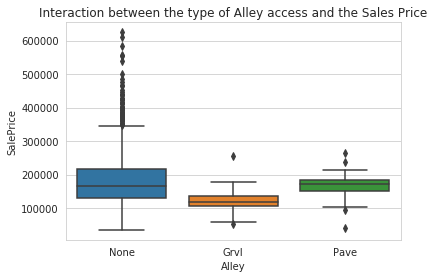

In [40]:
train.loc[:, "Alley"] = train.loc[:, "Alley"].fillna("None")
sns.boxplot(train["Alley"], train["SalePrice"])
plt.title("Interaction between the type of Alley access and the Sales Price")

In [41]:
train["SalePrice"].groupby(train["Alley"]).describe()

,count,mean,std,min,25%,50%,75%,max
Alley,,,,,,,,
Grvl,50.0,122219.080000,34780.780734,52500.0,105312.5,119500.0,136750.0,256000.0
None,1365.0,182638.254945,77810.840917,34900.0,130500.0,165000.0,217000.0,625000.0
Pave,41.0,168000.585366,38370.375243,40000.0,151000.0,172500.0,185000.0,265979.0


#### LotShape

Text(0.5, 1.0, 'Interaction of the Shape of the Lot and the Sales Price')

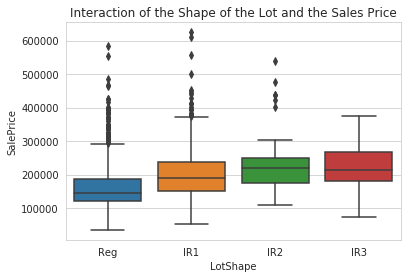

In [42]:
sns.boxplot(train["LotShape"], train["SalePrice"])
plt.title("Interaction of the Shape of the Lot and the Sales Price")

In [43]:
train["SalePrice"].groupby(train["LotShape"]).describe()

,count,mean,std,min,25%,50%,75%,max
LotShape,,,,,,,,
IR1,481.0,203884.523909,78607.680933,52000.0,150000.0,189000.0,239000.0,625000.0
IR2,41.0,239833.365854,99669.427362,110000.0,175000.0,221000.0,250000.0,538000.0
IR3,9.0,222262.777778,85019.978355,73000.0,181000.0,215000.0,267000.0,375000.0
Reg,925.0,164754.818378,69673.427215,34900.0,120000.0,146000.0,188000.0,582933.0


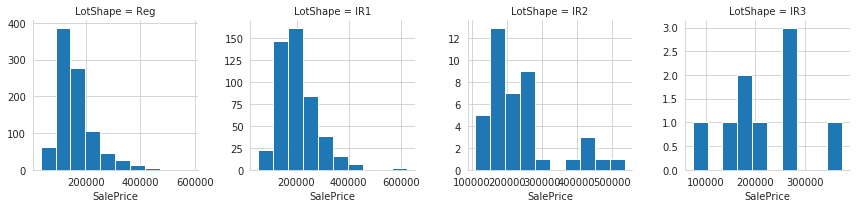

In [44]:
g = sns.FacetGrid(train, col = "LotShape", sharex = False, sharey = False)
g = g.map(plt.hist, "SalePrice")

#### LandContour

Text(0.5, 1.0, 'Interaction of the Contour of the Lot and the Sales Price')

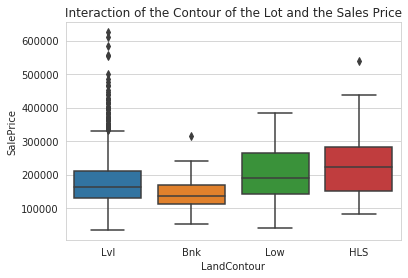

In [45]:
sns.boxplot(train["LandContour"], train["SalePrice"])
plt.title("Interaction of the Contour of the Lot and the Sales Price")

In [46]:
train["SalePrice"].groupby(train["LandContour"]).describe()

,count,mean,std,min,25%,50%,75%,max
LandContour,,,,,,,,
Bnk,61.0,142144.377049,49831.210475,52500.0,111000.0,136500.0,168000.00,315000.0
HLS,50.0,231533.940000,101790.139741,82500.0,151750.0,222250.0,281347.25,538000.0
Low,36.0,203661.111111,83935.353620,39300.0,143000.0,190000.0,263750.00,385000.0
Lvl,1309.0,179313.133690,75290.634373,34900.0,130000.0,162900.0,211000.00,625000.0


#### LotConfig

Text(0.5, 1.0, 'Interaction of the Configuration of the Lot and the Sales Price')

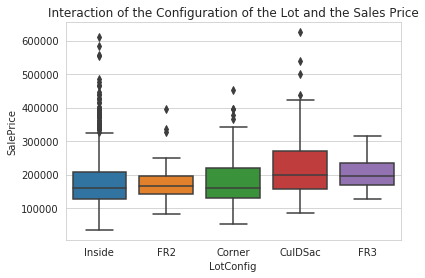

In [47]:
sns.boxplot(train["LotConfig"], train["SalePrice"])
plt.title("Interaction of the Configuration of the Lot and the Sales Price")

In [48]:
train["SalePrice"].groupby(train["LotConfig"]).describe()

,count,mean,std,min,25%,50%,75%,max
LotConfig,,,,,,,,
Corner,260.0,177334.465385,68571.693886,52500.0,128875.0,160000.0,218500.0,451950.0
CulDSac,94.0,223854.617021,93117.546586,84000.0,156475.0,199262.0,269342.5,625000.0
FR2,47.0,177934.574468,62788.926829,81000.0,143500.0,165000.0,194500.0,394617.0
FR3,4.0,208475.000000,78379.222374,128000.0,169925.0,195450.0,234000.0,315000.0
Inside,1051.0,176930.614653,76462.810425,34900.0,128000.0,159500.0,207250.0,611657.0


#### LandSlope

Text(0.5, 1.0, 'Interaction of the Slope of the Land and the Sales Price')

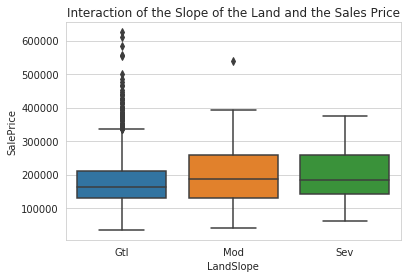

In [49]:
sns.boxplot(train["LandSlope"], train["SalePrice"])
plt.title("Interaction of the Slope of the Land and the Sales Price")

In [50]:
train["SalePrice"].groupby(train["LandSlope"]).describe()

,count,mean,std,min,25%,50%,75%,max
LandSlope,,,,,,,,
Gtl,1378.0,179140.455007,75722.330847,34900.0,129900.0,161625.0,212000.0,625000.0
Mod,65.0,196734.138462,92375.358116,39300.0,130000.0,186700.0,259500.0,538000.0
Sev,13.0,204379.230769,86729.922409,61000.0,143000.0,185000.0,260000.0,375000.0


In [51]:
stats.ttest_ind(train[train["LandSlope"] == "Mod"]["SalePrice"], train[train["LandSlope"] == "Sev"]["SalePrice"])

Ttest_indResult(statistic=-0.2749848993247318, pvalue=0.784074021996297)

In [52]:
train.loc[train["LandSlope"] == "Sev", "LandSlope"] = "LS_group"
train.loc[train["LandSlope"] == "Mod", "LandSlope"] = "LS_group"

In [53]:
stats.ttest_ind(train[train["LandSlope"] == "Gtl"]["SalePrice"], train[train["LandSlope"] == "LS_group"]["SalePrice"])

Ttest_indResult(statistic=-2.1161985555463105, pvalue=0.03449747599619435)

None of the levels are significantly different from one another, and as such the variable should not be used in analysis.

In [54]:
train.drop(columns = "LandSlope", inplace = True)

#### Utilities

Text(0.5, 1.0, 'Interaction of the Utilities and the Sales Price')

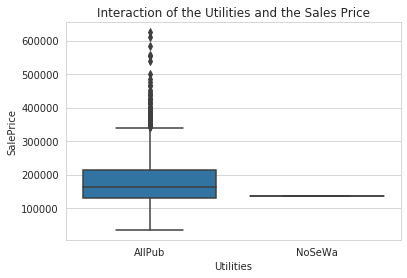

In [55]:
sns.boxplot(train["Utilities"], train["SalePrice"])
plt.title("Interaction of the Utilities and the Sales Price")

In [56]:
train["SalePrice"].groupby(train["Utilities"]).describe()

,count,mean,std,min,25%,50%,75%,max
Utilities,,,,,,,,
AllPub,1455.0,180180.547079,76714.802815,34900.0,129900.0,163000.0,214000.0,625000.0
NoSeWa,1.0,137500.000000,NaN,137500.0,137500.0,137500.0,137500.0,137500.0


All properties but one use all public utilities. The other proerpty has electricty and gas (No sewer or water). Since the NoSeWa level is drastically underrepresented in the data set, I can't use it usefully in the analysis. I won't be using this variable.

In [57]:
train.drop(columns = "Utilities", inplace = True)

#### Neighborhood

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

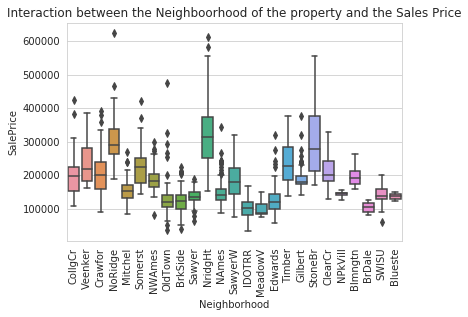

In [58]:
sns.boxplot(train["Neighborhood"], train["SalePrice"])
plt.title("Interaction between the Neighboorhood of the property and the Sales Price")
plt.xticks(rotation = "vertical")

#### Conditions (1 & 2)
Condition1 shows the proximity to various conditions, and condition2 was created to show if a property was near more than one of the listed conditions in condition1. I'm not sure how it was decided whether certain conditions would be input in condition1 or condition2. I'm also not sure how frequently it occurs that a property is near to more than 2 of these conditions, or if that is possible.

Text(0.5, 1.0, 'Interaction between First Condition and the Sales Price')

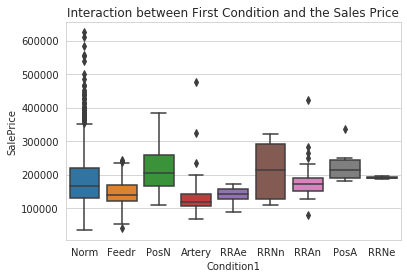

In [59]:
sns.boxplot(train["Condition1"], train["SalePrice"])
plt.title("Interaction between First Condition and the Sales Price")

In [60]:
train["SalePrice"].groupby(train["Condition1"]).describe()

,count,mean,std,min,25%,50%,75%,max
Condition1,,,,,,,,
Artery,48.0,135091.666667,66226.660548,66500.0,105000.00,119550.0,143000.0,475000.0
Feedr,80.0,142256.425000,42376.853783,40000.0,120825.00,139500.0,167750.0,244600.0
Norm,1258.0,183596.438792,78125.094804,34900.0,131500.00,165800.0,219427.5,625000.0
PosA,8.0,225875.000000,52348.932313,180000.0,188750.00,212500.0,244000.0,335000.0
PosN,18.0,216875.000000,66718.804673,109500.0,166125.00,206000.0,257375.0,385000.0
RRAe,11.0,138400.000000,24030.813553,87000.0,127750.00,142500.0,156500.0,171000.0
RRAn,26.0,184396.615385,66177.922070,79500.0,152393.75,171495.0,190105.0,423000.0
RRNe,2.0,190750.000000,5303.300859,187000.0,188875.00,190750.0,192625.0,194500.0
RRNn,5.0,212400.000000,93823.238060,110000.0,128000.00,214000.0,290000.0,320000.0


Text(0.5, 1.0, 'Interaction between Second Condition and Sales Price')

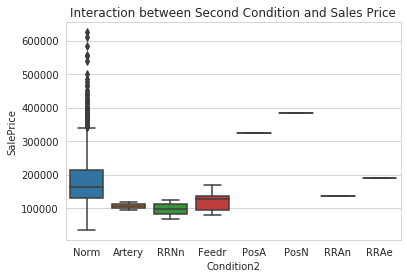

In [61]:
sns.boxplot(train["Condition2"], train["SalePrice"])
plt.title("Interaction between Second Condition and Sales Price")

In [62]:
train["SalePrice"].groupby(train["Condition2"]).describe()

,count,mean,std,min,25%,50%,75%,max
Condition2,,,,,,,,
Artery,2.0,106500.000000,16263.455967,95000.0,100750.0,106500.0,112250.0,118000.0
Feedr,6.0,121166.666667,33544.994659,79500.0,95500.0,127500.0,137000.0,167500.0
Norm,1442.0,180395.139390,76534.610491,34900.0,130000.0,163250.0,214000.0,625000.0
PosA,1.0,325000.000000,NaN,325000.0,325000.0,325000.0,325000.0,325000.0
PosN,1.0,385000.000000,NaN,385000.0,385000.0,385000.0,385000.0,385000.0
RRAe,1.0,190000.000000,NaN,190000.0,190000.0,190000.0,190000.0,190000.0
RRAn,1.0,136905.000000,NaN,136905.0,136905.0,136905.0,136905.0,136905.0
RRNn,2.0,96750.000000,39951.533137,68500.0,82625.0,96750.0,110875.0,125000.0


In [63]:
pd.crosstab(train["Condition1"], train["Condition2"])

Condition2,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn
Condition1,,,,,,,,
Artery,2,0,45,1,0,0,0,0
Feedr,0,1,75,0,0,1,1,2
Norm,0,0,1258,0,0,0,0,0
PosA,0,0,8,0,0,0,0,0
PosN,0,0,17,0,1,0,0,0
RRAe,0,0,11,0,0,0,0,0
RRAn,0,4,22,0,0,0,0,0
RRNe,0,0,2,0,0,0,0,0
RRNn,0,1,4,0,0,0,0,0


There are 1260 properties which are marked as being normal in both data sets, indicating that they are not near any of the listed conditions. Since there are a total of 1444 properties marked as normal when grouping by condition 2, indicating that there are 184 properties which are near only one condition.



#### House Style & Building Type

Text(0.5, 1.0, 'Interaction between the House Style and the Sales Price')

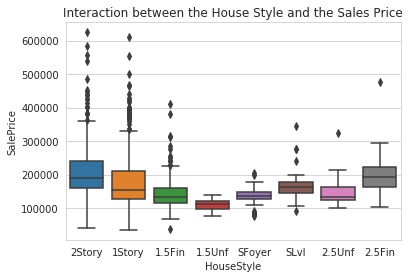

In [64]:
sns.boxplot(train["HouseStyle"], train["SalePrice"])
plt.title("Interaction between the House Style and the Sales Price")

In [65]:
train["SalePrice"].groupby(train["HouseStyle"]).describe()

,count,mean,std,min,25%,50%,75%,max
HouseStyle,,,,,,,,
1.5Fin,154.0,143116.740260,54277.941119,37900.0,114625.0,132000.0,159325.5,410000.0
1.5Unf,14.0,110150.000000,19036.473090,76000.0,98175.0,111250.0,120500.0,139400.0
1Story,726.0,175985.477961,77055.715011,34900.0,127000.0,154750.0,209350.0,611657.0
2.5Fin,8.0,220000.000000,118211.976671,104000.0,164250.0,194000.0,223750.0,475000.0
2.5Unf,11.0,157354.545455,63934.128032,101000.0,125000.0,133900.0,163500.0,325000.0
2Story,441.0,207773.888889,79748.490952,40000.0,158900.0,190000.0,239900.0,625000.0
SFoyer,37.0,135074.486486,30480.898192,75500.0,127500.0,135960.0,148000.0,206300.0
SLvl,65.0,166703.384615,38305.161339,91000.0,145000.0,164500.0,178000.0,345000.0


Text(0.5, 1.0, 'Interaction of Building Type and Sales Price')

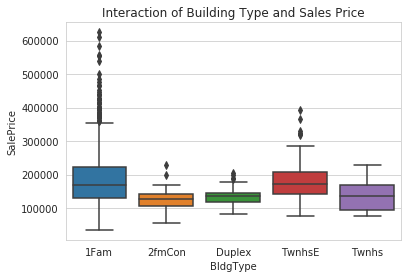

In [66]:
sns.boxplot(train["BldgType"], train["SalePrice"])
plt.title("Interaction of Building Type and Sales Price")

#### OverallCond

Text(0.5, 1.0, 'Interaction of the Overall Condition and Sales Price')

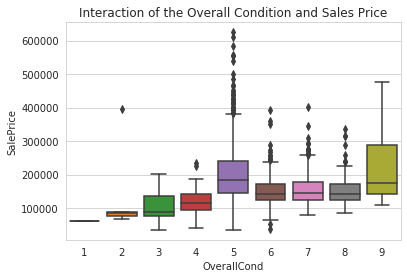

In [67]:
sns.boxplot(train["OverallCond"], train["SalePrice"])
plt.title("Interaction of the Overall Condition and Sales Price")

In [68]:
train["SalePrice"].groupby(train["OverallCond"]).describe()

,count,mean,std,min,25%,50%,75%,max
OverallCond,,,,,,,,
1,1.0,61000.000000,NaN,61000.0,61000.0,61000.0,61000.0,61000.0
2,5.0,141986.400000,141342.813488,67000.0,76500.0,85000.0,87000.0,394432.0
3,25.0,101929.400000,44852.490403,35311.0,76000.0,89500.0,135000.0,200624.0
4,57.0,120438.438596,38922.525907,40000.0,92900.0,115000.0,143000.0,235000.0
5,818.0,202559.739609,83121.320239,34900.0,143925.0,185250.0,239639.5,625000.0
6,251.0,151567.015936,47466.954613,37900.0,124250.0,142500.0,171250.0,392000.0
7,205.0,158145.487805,53468.189431,79900.0,123500.0,145000.0,178000.0,402000.0
8,72.0,155651.736111,52375.144681,84500.0,125375.0,142500.0,170750.0,335000.0
9,22.0,216004.545455,96485.974689,110500.0,143500.0,176200.0,287875.0,475000.0


The majority of the properties in the data set are average, above average, and good condition. There are no very excellent properties, and only one very poor.

#### RoofStyle &  RoofMatl

Text(0.5, 1.0, 'Interaction of The Roofing Material and Sales Price')

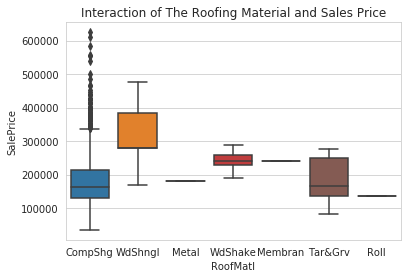

In [69]:
sns.boxplot(train["RoofMatl"], train["SalePrice"])
plt.title("Interaction of The Roofing Material and Sales Price")

In [70]:
train["SalePrice"].groupby(train["RoofMatl"]).describe()

,count,mean,std,min,25%,50%,75%,max
RoofMatl,,,,,,,,
CompShg,1432.0,179405.534916,76326.950505,34900.0,129800.0,162000.0,213000.0,625000.0
Membran,1.0,241500.000000,NaN,241500.0,241500.0,241500.0,241500.0,241500.0
Metal,1.0,180000.000000,NaN,180000.0,180000.0,180000.0,180000.0,180000.0
Roll,1.0,137000.000000,NaN,137000.0,137000.0,137000.0,137000.0,137000.0
Tar&Grv,11.0,185406.363636,65430.141720,82000.0,136000.0,167000.0,249000.0,274970.0
WdShake,5.0,241400.000000,36218.779659,190000.0,228000.0,242000.0,260000.0,287000.0
WdShngl,5.0,317300.000000,116758.083232,168500.0,278000.0,280000.0,385000.0,475000.0


Text(0.5, 1.0, 'Interaction of the Roof style and the Sales Price')

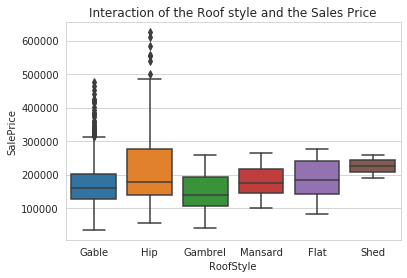

In [71]:
sns.boxplot(train["RoofStyle"], train["SalePrice"])
plt.title("Interaction of the Roof style and the Sales Price")

In [72]:
train["SalePrice"].groupby(train["RoofStyle"]).describe()

,count,mean,std,min,25%,50%,75%,max
RoofStyle,,,,,,,,
Flat,13.0,194690.000000,62522.963515,82000.0,143000.0,185000.0,242000.0,274970.0
Gable,1140.0,170972.100000,64066.334267,34900.0,128000.0,159975.0,202500.0,475000.0
Gambrel,11.0,148909.090909,67013.527807,40000.0,105500.0,139000.0,193750.0,259500.0
Hip,283.0,217346.477032,107588.739782,55000.0,139300.0,176500.0,277750.0,625000.0
Mansard,7.0,180568.428571,58057.624627,100000.0,145500.0,175000.0,216000.0,265979.0
Shed,2.0,225000.000000,49497.474683,190000.0,207500.0,225000.0,242500.0,260000.0


#### Exterior Qualities

There are multiple variables describing the exterior of the properties, including ExterQual, ExterCond, Exterior1st, Exterior2nd, and MasVnrType.

As with the Condition1 and Condition2 variables above, I'm not sure how properties with more than two exterior materials (Exterior1st and Exterior2nd) were recorded or how it was decided which should be listed first or second.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

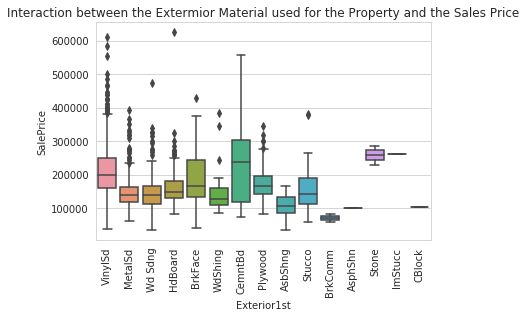

In [73]:
sns.boxplot(train["Exterior1st"], train["SalePrice"])
plt.title("Interaction between the Extermior Material used for the Property and the Sales Price")
plt.xticks(rotation = "vertical")

In [74]:
train["SalePrice"].groupby(train["Exterior1st"]).describe()

,count,mean,std,min,25%,50%,75%,max
Exterior1st,,,,,,,,
AsbShng,20.0,107385.550000,33756.480660,35311.0,85750.0,108000.0,133500.00,165500.0
AsphShn,1.0,100000.000000,NaN,100000.0,100000.0,100000.0,100000.00,100000.0
BrkComm,2.0,71000.000000,15556.349186,60000.0,65500.0,71000.0,76500.00,82000.0
BrkFace,50.0,194573.000000,82841.914370,40000.0,134525.0,165750.0,245125.00,430000.0
CBlock,1.0,105000.000000,NaN,105000.0,105000.0,105000.0,105000.00,105000.0
CemntBd,60.0,232473.000000,121436.925001,75000.0,118375.0,238750.0,304082.75,556581.0
HdBoard,221.0,160399.067873,53071.874455,83000.0,129500.0,149900.0,179900.00,625000.0
ImStucc,1.0,262000.000000,NaN,262000.0,262000.0,262000.0,262000.00,262000.0
MetalSd,220.0,149422.177273,54776.408990,62383.0,117750.0,139000.0,164775.00,392000.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

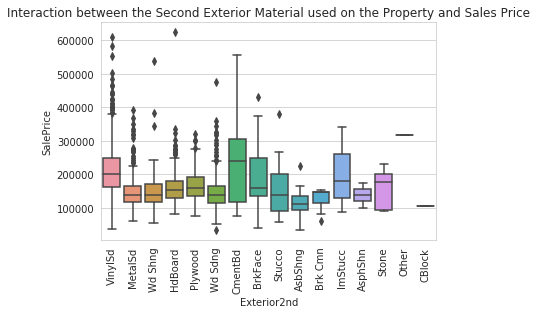

In [75]:
sns.boxplot(train["Exterior2nd"], train["SalePrice"])
plt.title("Interaction between the Second Exterior Material used on the Property and Sales Price")
plt.xticks(rotation = "vertical")

In [76]:
train["SalePrice"].groupby(train["Exterior2nd"]).describe()

,count,mean,std,min,25%,50%,75%,max
Exterior2nd,,,,,,,,
AsbShng,20.0,114060.550000,42315.043608,35311.0,94000.0,111000.0,135500.0,225000.0
AsphShn,3.0,138000.000000,37509.998667,100000.0,119500.0,139000.0,157000.0,175000.0
Brk Cmn,7.0,126714.285714,38693.084161,60000.0,114000.0,147000.0,148500.0,155000.0
BrkFace,25.0,195818.000000,95097.551756,40000.0,137000.0,160000.0,250000.0,430000.0
CBlock,1.0,105000.000000,NaN,105000.0,105000.0,105000.0,105000.0,105000.0
CmentBd,59.0,230862.372881,116983.346492,75000.0,117250.0,241000.0,304688.5,556581.0
HdBoard,206.0,164810.407767,56934.760996,83000.0,130250.0,154750.0,181000.0,625000.0
ImStucc,9.0,197300.000000,90745.027412,88000.0,130000.0,179200.0,262000.0,341000.0
MetalSd,214.0,149803.172897,55078.595310,62383.0,118625.0,138750.0,164525.0,392000.0


In [77]:
pd.crosstab(train["Exterior1st"], train["Exterior2nd"])

Exterior2nd,AsbShng,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng
Exterior1st,,,,,,,,,,,,,,,,
AsbShng,17,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0
AsphShn,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BrkComm,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
BrkFace,1,0,0,24,0,0,3,0,0,0,6,2,1,0,12,1
CBlock,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
CemntBd,0,0,0,0,0,58,0,0,0,0,0,0,0,0,1,1
HdBoard,0,1,0,0,0,0,192,2,1,0,23,0,0,0,1,1
ImStucc,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
MetalSd,0,1,0,0,0,0,3,0,212,0,0,0,1,0,2,1


Text(0.5, 1.0, 'Interaction of the Exterior Condition and the Sales Price')

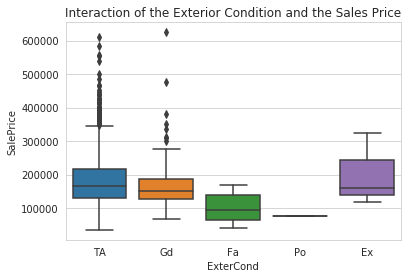

In [78]:
sns.boxplot(train["ExterCond"], train["SalePrice"])
plt.title("Interaction of the Exterior Condition and the Sales Price")

Text(0.5, 1.0, 'Interaction between The Exterior Quality and the Sales Price')

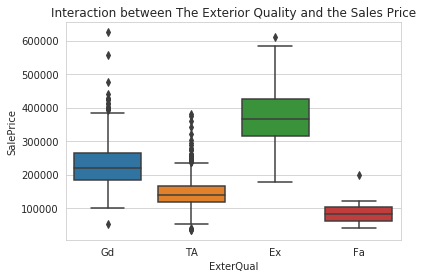

In [79]:
sns.boxplot(train["ExterQual"], train["SalePrice"])
plt.title("Interaction between The Exterior Quality and the Sales Price")

The Exterior Quality has a notable effect accross the levels on the Sale Price.

Text(0.5, 1.0, 'Interaction between The Masonry Veneer Type and the Sales Price')

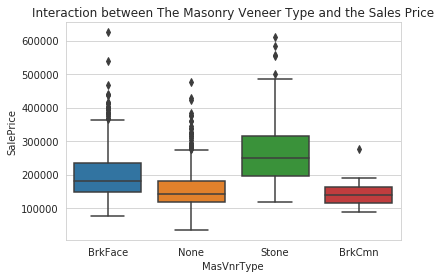

In [80]:
sns.boxplot(train["MasVnrType"], train["SalePrice"])
plt.title("Interaction between The Masonry Veneer Type and the Sales Price")

In [81]:
train["SalePrice"].groupby(train["MasVnrType"]).describe()

,count,mean,std,min,25%,50%,75%,max
MasVnrType,,,,,,,,
BrkCmn,15.0,146318.066667,46187.583632,89471.0,114250.0,139000.0,163950.0,277000.0
BrkFace,444.0,203452.439189,76977.276561,75000.0,149225.0,181000.0,235250.0,625000.0
None,863.0,155539.645423,57333.631552,34900.0,118982.0,143000.0,181317.0,475000.0
Stone,126.0,267063.126984,100020.903831,119000.0,197000.0,248614.0,314593.0,611657.0


In [82]:
stats.ttest_ind(train[train["MasVnrType"] == "BrkCmn"]["SalePrice"], train[train["MasVnrType"] == "None"]["SalePrice"])

Ttest_indResult(statistic=-0.6193286951447855, pvalue=0.5358608795946658)

In [83]:
train.loc[train["MasVnrType"] == "BrkCmn", "MasVnrType"] = "Group"
train.loc[train["MasVnrType"] == "None", "MasVnrType"] = "Group"

In [84]:
stats.ttest_ind(train[train["MasVnrType"] == "BrkFace"]["SalePrice"], train[train["MasVnrType"] == "Group"]["SalePrice"])

Ttest_indResult(statistic=12.800159351803595, pvalue=1.9053713685163177e-35)

#### Foundation

Text(0.5, 1.0, 'Interaction between the foundation type and the Sales Price')

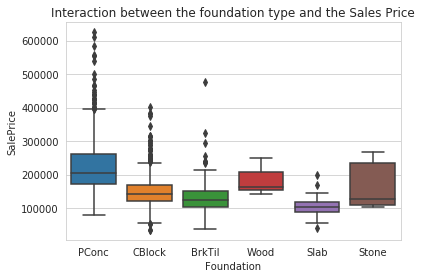

In [85]:
sns.boxplot(train["Foundation"], train["SalePrice"])
plt.title("Interaction between the foundation type and the Sales Price")

In [86]:
train["SalePrice"].groupby(train["Foundation"]).describe()

,count,mean,std,min,25%,50%,75%,max
Foundation,,,,,,,,
BrkTil,146.0,132291.075342,54592.393032,37900.0,102400.0,125250.0,151250.00,475000.0
CBlock,634.0,149805.714511,48295.041759,34900.0,122125.0,141500.0,168000.00,402861.0
PConc,643.0,223762.590980,81996.368548,78000.0,173000.0,205000.0,261750.00,625000.0
Slab,24.0,107365.625000,34213.980939,39300.0,89375.0,104150.0,118884.50,198500.0
Stone,6.0,165959.166667,78557.704413,102776.0,109625.0,126500.0,233734.25,266500.0
Wood,3.0,185666.666667,56695.090910,143000.0,153500.0,164000.0,207000.00,250000.0


#### Basement Variables

There are multiple variables which describe different aspects and qualities of the basments of the properties.

Text(0.5, 1.0, 'Interaction between the Basement Condition and the Sales Price')

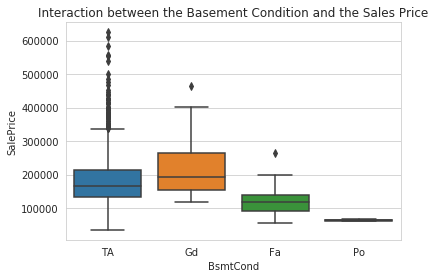

In [87]:
sns.boxplot(train["BsmtCond"], train["SalePrice"])
plt.title("Interaction between the Basement Condition and the Sales Price")

Text(0.5, 1.0, 'Interaction between Basement Quality and Sales Price')

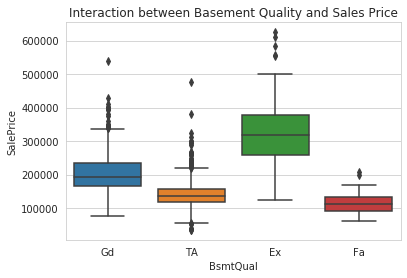

In [88]:
sns.boxplot(train["BsmtQual"], train["SalePrice"])
plt.title("Interaction between Basement Quality and Sales Price")

In [89]:
pd.crosstab(train["BsmtCond"], train["BsmtQual"])

BsmtQual,Ex,Fa,Gd,TA
BsmtCond,,,,
Fa,0,8,2,35
Gd,11,0,36,18
Po,0,2,0,0
TA,106,25,580,596


Text(0.5, 1.0, 'Interaction between the Basement Exposure and the Sales Price')

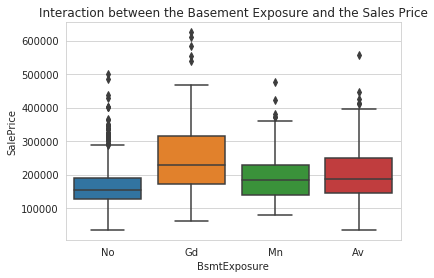

In [90]:
sns.boxplot(train["BsmtExposure"], train["SalePrice"])
plt.title("Interaction between the Basement Exposure and the Sales Price")

In [91]:
train["SalePrice"].groupby(train["BsmtExposure"]).describe()

,count,mean,std,min,25%,50%,75%,max
BsmtExposure,,,,,,,,
Av,220.0,204196.345455,81032.449482,35311.0,144875.00,185675.0,248471.0,556581.0
Gd,131.0,255196.061069,111562.404275,61000.0,172950.00,228950.0,316050.0,625000.0
Mn,114.0,192789.657895,77335.442652,78000.0,138821.75,182450.0,228092.0,475000.0
No,953.0,165652.295908,60695.724915,34900.0,126000.00,154000.0,191000.0,501837.0


Text(0.5, 1.0, 'Interaction between The Exposure of the Basement and the Sales Price')

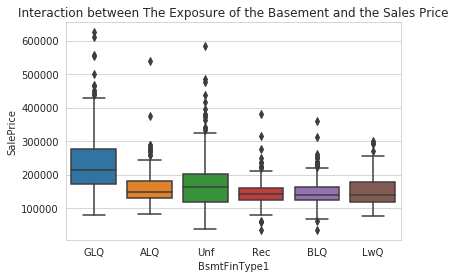

In [92]:
sns.boxplot(train["BsmtFinType1"], train["SalePrice"])
plt.title("Interaction between The Exposure of the Basement and the Sales Price")

In [93]:
train["SalePrice"].groupby(train["BsmtFinType1"]).describe()

,count,mean,std,min,25%,50%,75%,max
BsmtFinType1,,,,,,,,
ALQ,220.0,161573.068182,50821.277231,81000.0,129000.0,149250.0,179925.00,538000.0
BLQ,148.0,149493.655405,47327.292126,35311.0,122750.0,139100.0,163100.00,359100.0
GLQ,414.0,233232.330918,86406.658043,80000.0,173125.0,213750.0,276500.00,625000.0
LwQ,74.0,151852.702703,50796.987083,75500.0,119000.0,139000.0,179125.00,301000.0
Rec,133.0,146889.248120,45190.118879,34900.0,123000.0,142000.0,161500.00,381000.0
Unf,430.0,170670.576744,72577.080129,37900.0,118100.0,161750.0,202623.75,582933.0


Text(0.5, 1.0, 'Interaction between The Exposure of the Basement and the Sales Price')

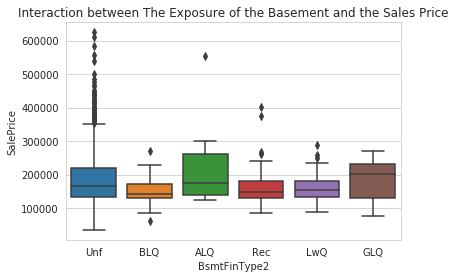

In [94]:
sns.boxplot(train["BsmtFinType2"], train["SalePrice"])
plt.title("Interaction between The Exposure of the Basement and the Sales Price")

In [95]:
train["SalePrice"].groupby(train["BsmtFinType2"]).describe()

,count,mean,std,min,25%,50%,75%,max
BsmtFinType2,,,,,,,,
ALQ,19.0,209942.105263,104764.743411,123500.0,139000.0,174900.0,262500.0,555000.0
BLQ,33.0,151101.000000,41611.305388,62383.0,129000.0,143000.0,172500.0,271900.0
GLQ,14.0,180982.142857,64573.040359,75500.0,130250.0,203125.0,231500.0,270000.0
LwQ,46.0,164364.130435,43255.035241,88000.0,134500.0,154000.0,179750.0,287000.0
Rec,54.0,164917.129630,59183.277020,85000.0,129000.0,148750.0,180175.0,402000.0
Unf,1252.0,183811.326677,78195.818911,34900.0,132000.0,167000.0,219500.0,625000.0


Text(0.5, 1.0, 'Interaction between the Number of Full Bathrooms in the Basement and the Sales Price')

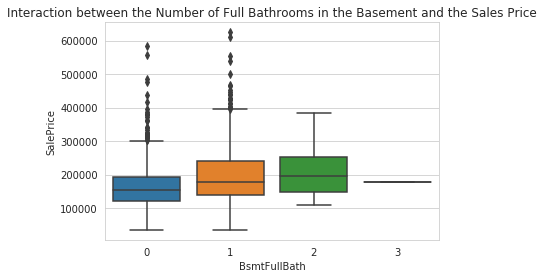

In [96]:
sns.boxplot(train["BsmtFullBath"], train["SalePrice"])
plt.title("Interaction between the Number of Full Bathrooms in the Basement and the Sales Price")

In [97]:
train["SalePrice"].groupby(train["BsmtFullBath"]).describe()

,count,mean,std,min,25%,50%,75%,max
BsmtFullBath,,,,,,,,
0,855.0,164832.191813,65121.672761,34900.0,120500.0,154000.0,192320.0,582933.0
1,586.0,201627.518771,86169.042599,35311.0,140000.0,177950.0,241875.0,625000.0
2,14.0,216853.285714,89314.175978,108959.0,146925.0,197150.0,252237.5,385000.0
3,1.0,179000.000000,NaN,179000.0,179000.0,179000.0,179000.0,179000.0


Text(0.5, 1.0, 'Interaction between the Number of Half Bathrooms in the Basement and the Sales Price')

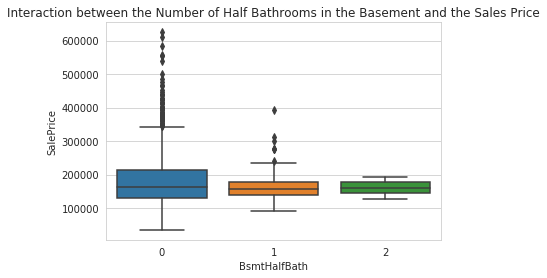

In [98]:
sns.boxplot(train["BsmtHalfBath"], train["SalePrice"])
plt.title("Interaction between the Number of Half Bathrooms in the Basement and the Sales Price")

In [99]:
train["SalePrice"].groupby(train["BsmtHalfBath"]).describe()

,count,mean,std,min,25%,50%,75%,max
BsmtHalfBath,,,,,,,,
0,1375.0,180833.196364,77916.083898,34900.0,129000.00,163000.0,215000.00,625000.0
1,79.0,168770.253165,51086.155558,91500.0,138250.00,158500.0,178950.00,392500.0
2,2.0,160850.500000,47164.729412,127500.0,144175.25,160850.5,177525.75,194201.0


#### Heating and Central Air

Text(0.5, 1.0, 'Interaction between the Heating Type and the Sales Price')

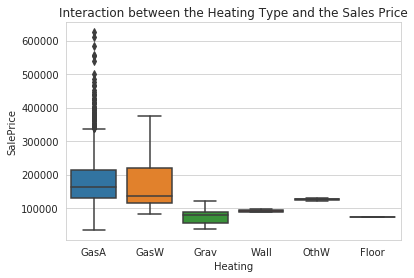

In [100]:
sns.boxplot(train["Heating"], train["SalePrice"])
plt.title("Interaction between the Heating Type and the Sales Price")

Text(0.5, 1.0, 'Interaction between the quality of the heating and the Sales Price')

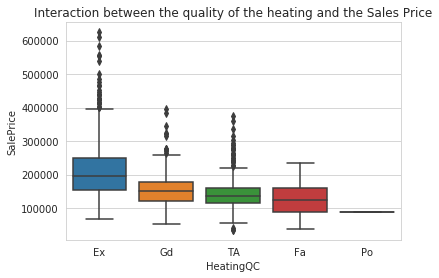

In [101]:
sns.boxplot(train["HeatingQC"], train["SalePrice"])
plt.title("Interaction between the quality of the heating and the Sales Price")

In [102]:
train["SalePrice"].groupby(train["HeatingQC"]).describe()

,count,mean,std,min,25%,50%,75%,max
HeatingQC,,,,,,,,
Ex,737.0,213577.804613,83110.202919,66500.0,154000.0,194700.0,251000.0,625000.0
Fa,49.0,123919.489796,50306.618996,37900.0,87000.0,123500.0,161000.0,235000.0
Gd,241.0,156858.871369,52923.920003,52000.0,122500.0,152000.0,179200.0,395000.0
Po,1.0,87000.000000,NaN,87000.0,87000.0,87000.0,87000.0,87000.0
TA,428.0,142362.876168,47226.485663,34900.0,115000.0,135000.0,158925.0,375000.0


Text(0.5, 1.0, 'Interaction of the Prescence of Central Air and Sales Price')

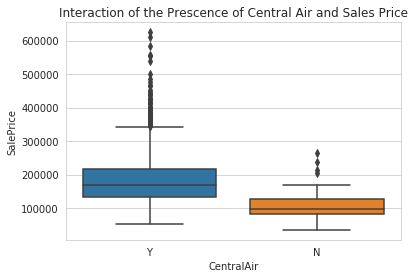

In [103]:
sns.boxplot(train["CentralAir"], train["SalePrice"])
plt.title("Interaction of the Prescence of Central Air and Sales Price")

In [104]:
train["SalePrice"].groupby(train["CentralAir"]).describe()

,count,mean,std,min,25%,50%,75%,max
CentralAir,,,,,,,,
N,95.0,105264.073684,40671.273961,34900.0,82000.0,98000.0,128500.0,265979.0
Y,1361.0,185378.478325,75893.684205,52000.0,134500.0,168000.0,218000.0,625000.0


#### Electrical 

Text(0.5, 1.0, 'Interaction between the Electrical System and Sales Price')

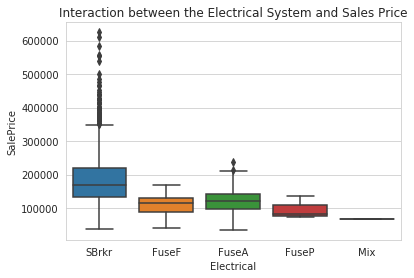

In [105]:
sns.boxplot(train["Electrical"], train["SalePrice"])
plt.title("Interaction between the Electrical System and Sales Price")

#### Rooms in the Property

Text(0.5, 1.0, 'Interaction between the Number of Half Baths Above Ground and Sales Price')

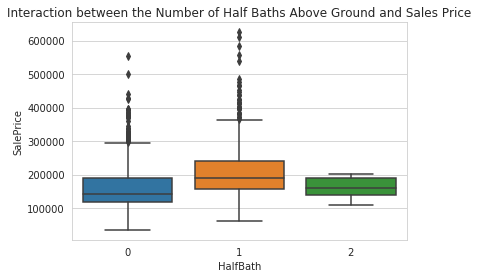

In [106]:
sns.boxplot(train["HalfBath"], train["SalePrice"])
plt.title("Interaction between the Number of Half Baths Above Ground and Sales Price")

In [107]:
train["SalePrice"].groupby(train["HalfBath"]).describe()

,count,mean,std,min,25%,50%,75%,max
HalfBath,,,,,,,,
0,913.0,162534.884995,67450.336922,34900.0,119500.0,143000.0,190000.00,555000.0
1,531.0,210850.280603,82551.739836,61000.0,157950.0,189000.0,240000.00,625000.0
2,12.0,162028.916667,30315.705676,108959.0,138250.0,159243.5,191050.25,201800.0


Text(0.5, 1.0, 'Interaction between Above Ground Bedrooms and Sales Price')

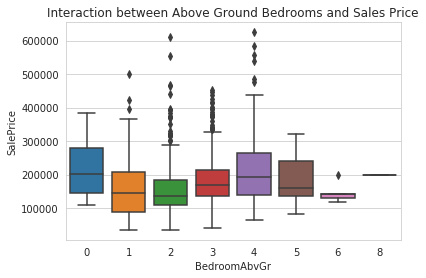

In [108]:
sns.boxplot(train["BedroomAbvGr"], train["SalePrice"])
plt.title("Interaction between Above Ground Bedrooms and Sales Price")

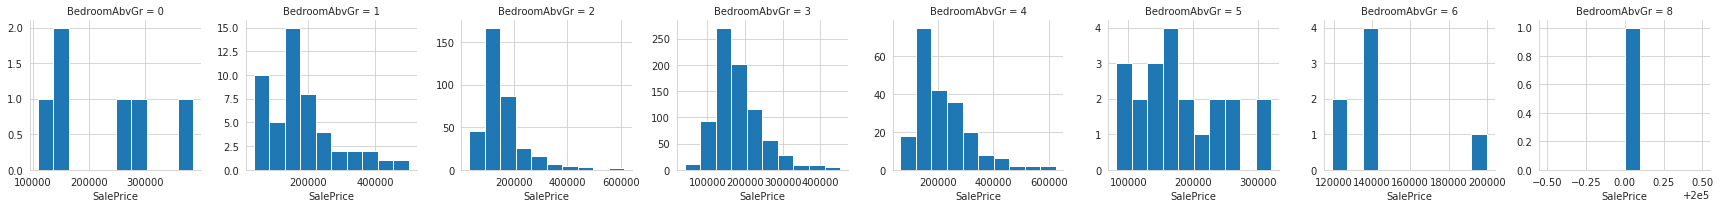

In [109]:
g = sns.FacetGrid(train, col = "BedroomAbvGr", sharex = False, sharey = False)
g = g.map(plt.hist, "SalePrice")

Text(0.5, 1.0, 'Interaction between the Number of Above Ground Kitchens and the Sales Price')

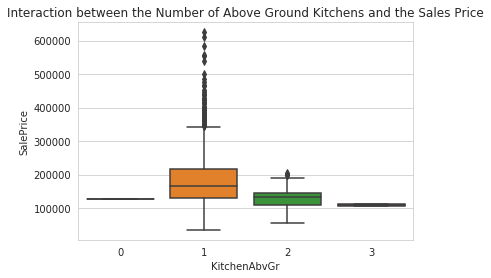

In [110]:
sns.boxplot(train["KitchenAbvGr"], train["SalePrice"])
plt.title("Interaction between the Number of Above Ground Kitchens and the Sales Price")

In [111]:
train["SalePrice"].groupby(train["KitchenAbvGr"]).describe()

,count,mean,std,min,25%,50%,75%,max
KitchenAbvGr,,,,,,,,
0,1.0,127500.000000,NaN,127500.0,127500.0,127500.0,127500.00,127500.0
1,1388.0,182588.217579,77440.899907,34900.0,131000.0,165500.0,216584.25,625000.0
2,65.0,131096.153846,31483.474549,55000.0,108959.0,133900.0,145000.00,206300.0
3,2.0,109500.000000,4949.747468,106000.0,107750.0,109500.0,111250.00,113000.0


Text(0.5, 1.0, 'Interaction between the Quality of the Kitchen and the Sales Price')

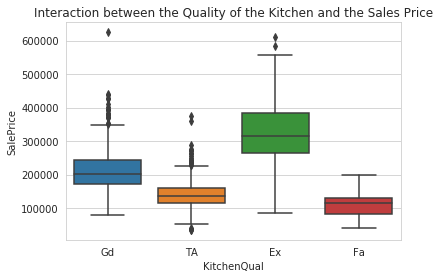

In [112]:
sns.boxplot(train["KitchenQual"], train["SalePrice"])
plt.title("Interaction between the Quality of the Kitchen and the Sales Price")

In [113]:
train["SalePrice"].groupby(train["KitchenQual"]).describe()

,count,mean,std,min,25%,50%,75%,max
KitchenQual,,,,,,,,
Ex,96.0,323028.302083,104572.942779,86000.0,264453.75,316750.0,384227.5,611657.0
Fa,39.0,105565.205128,36004.254037,39300.0,81000.00,115000.0,131500.0,200000.0
Gd,586.0,212116.023891,64020.176702,79000.0,172500.00,201400.0,242750.0,625000.0
TA,735.0,139962.511565,38896.280336,34900.0,116025.00,137000.0,160000.0,375000.0


#### Fireplace Features

Text(0.5, 1.0, 'Interaction betweenn the number of fireplaces and the Sales Price')

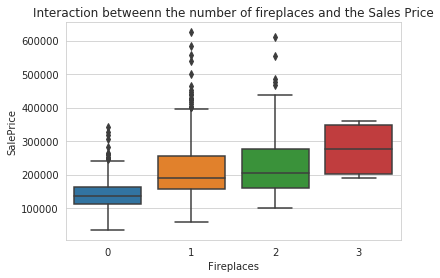

In [114]:
sns.boxplot(train["Fireplaces"], train["SalePrice"])
plt.title("Interaction betweenn the number of fireplaces and the Sales Price")

Text(0.5, 1.0, 'Interaction between the Fireplace Quality and the Sales Price')

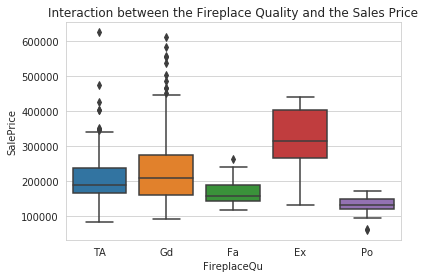

In [115]:
sns.boxplot(train["FireplaceQu"], train["SalePrice"])
plt.title("Interaction between the Fireplace Quality and the Sales Price")

#### Garage Features

Text(0.5, 1.0, 'Interaction between the Type of the Garage and the Sales Price')

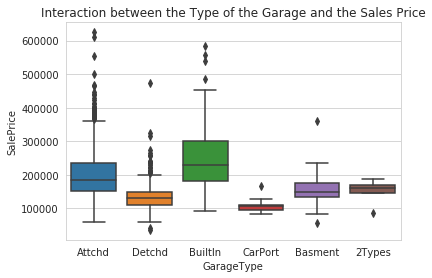

In [116]:
sns.boxplot(train["GarageType"], train["SalePrice"])
plt.title("Interaction between the Type of the Garage and the Sales Price")

In [117]:
train["SalePrice"].groupby(train["GarageType"]).describe()

,count,mean,std,min,25%,50%,75%,max
GarageType,,,,,,,,
2Types,6.0,151283.333333,34917.068415,87000.0,146250.0,159000.0,170250.0,186700.0
Attchd,867.0,201680.058824,72644.885780,60000.0,149950.0,185000.0,235000.0,625000.0
Basment,19.0,160570.684211,63967.283574,55993.0,132250.0,148000.0,174000.0,359100.0
BuiltIn,87.0,255556.356322,102542.859575,91000.0,180500.0,230000.0,301638.5,582933.0
CarPort,9.0,109962.111111,24638.183681,82000.0,95000.0,108000.0,110000.0,164900.0
Detchd,387.0,134091.162791,41391.549953,35311.0,110000.0,129500.0,147700.0,475000.0


Text(0.5, 1.0, 'Interaction between the Interior Finish of the Garage and the Sales Price')

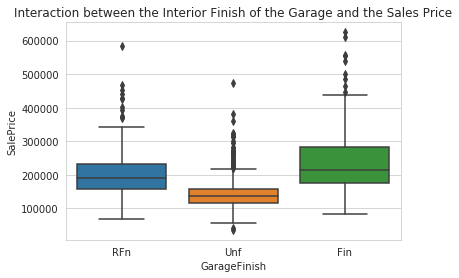

In [118]:
sns.boxplot(train["GarageFinish"], train["SalePrice"])
plt.title("Interaction between the Interior Finish of the Garage and the Sales Price")

Text(0.5, 1.0, 'Interaction between the Quality of the Garage and the Sales Price')

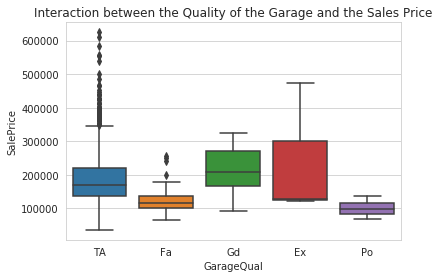

In [119]:
sns.boxplot(train["GarageQual"], train["SalePrice"])
plt.title("Interaction between the Quality of the Garage and the Sales Price")

In [120]:
train["SalePrice"].groupby(train["GarageQual"]).describe()

,count,mean,std,min,25%,50%,75%,max
GarageQual,,,,,,,,
Ex,3.0,241000.000000,202680.166765,120500.0,124000.0,127500.0,301250.0,475000.0
Fa,48.0,123573.354167,42971.440985,64500.0,99500.0,115000.0,135612.5,256000.0
Gd,14.0,215860.714286,74126.739021,90350.0,165975.0,209115.0,271852.5,325000.0
Po,3.0,100166.666667,35143.752408,67000.0,81750.0,96500.0,116750.0,137000.0
TA,1307.0,186652.199694,75753.638742,35311.0,135250.0,169990.0,219750.0,625000.0


Text(0.5, 1.0, 'Interaction between the Condition of the Garage and the Sales Price')

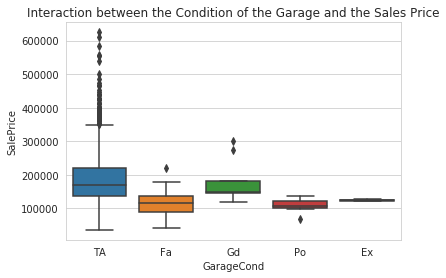

In [121]:
sns.boxplot(train["GarageCond"], train["SalePrice"])
plt.title("Interaction between the Condition of the Garage and the Sales Price")

Text(0.5, 1.0, 'Interaction between the Paving Type of the Driveway and the Sales Price')

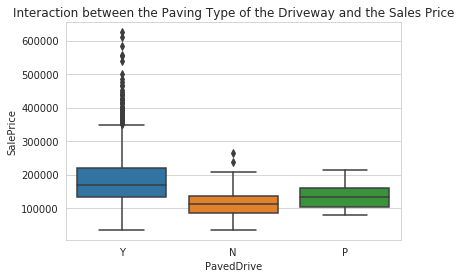

In [122]:
sns.boxplot(train["PavedDrive"], train["SalePrice"])
plt.title("Interaction between the Paving Type of the Driveway and the Sales Price")

#### Pool

Text(0.5, 1.0, 'Interaction between the Quality of the Pool and the Sales Price')

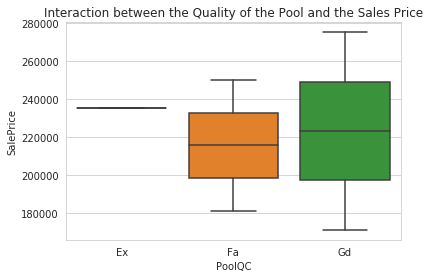

In [123]:
sns.boxplot(train["PoolQC"], train["SalePrice"])
plt.title("Interaction between the Quality of the Pool and the Sales Price")

In [124]:
train["SalePrice"].groupby(train["PoolQC"]).describe()

,count,mean,std,min,25%,50%,75%,max
PoolQC,,,,,,,,
Ex,1.0,235000.0,NaN,235000.0,235000.0,235000.0,235000.0,235000.0
Fa,2.0,215500.0,48790.367902,181000.0,198250.0,215500.0,232750.0,250000.0
Gd,2.0,222985.0,73517.892040,171000.0,196992.5,222985.0,248977.5,274970.0


#### Fence

Text(0.5, 1.0, 'Interaction between the Fence Quality and the Sales Price')

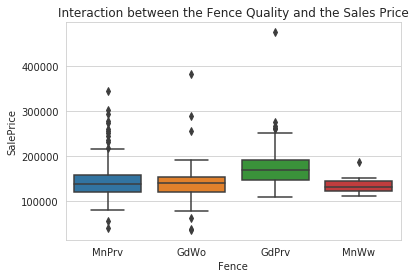

In [125]:
sns.boxplot(train["Fence"], train["SalePrice"])
plt.title("Interaction between the Fence Quality and the Sales Price")

#### Miscellaneous Features

Text(0.5, 1.0, 'Interaction between the Miscellaneous Feature of the House and the Sales Price')

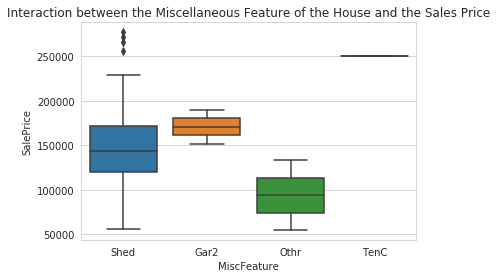

In [126]:
sns.boxplot(train["MiscFeature"], train["SalePrice"])
plt.title("Interaction between the Miscellaneous Feature of the House and the Sales Price")

In [127]:
train["SalePrice"].groupby(train["MiscFeature"]).describe()

,count,mean,std,min,25%,50%,75%,max
MiscFeature,,,,,,,,
Gar2,2.0,170750.000000,27223.611076,151500.0,161125.0,170750.0,180375.0,190000.0
Othr,2.0,94000.000000,55154.328933,55000.0,74500.0,94000.0,113500.0,133000.0
Shed,49.0,151187.612245,51642.728056,55993.0,120000.0,144000.0,172000.0,277000.0
TenC,1.0,250000.000000,NaN,250000.0,250000.0,250000.0,250000.0,250000.0


#### Functionality

Text(0.5, 1.0, 'Interaction between the Functionality of the Home and the Sales Price')

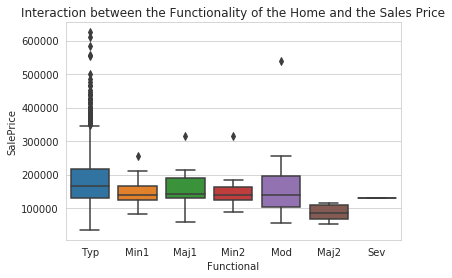

In [128]:
sns.boxplot(train["Functional"], train["SalePrice"])
plt.title("Interaction between the Functionality of the Home and the Sales Price")

In [129]:
train["SalePrice"].groupby(train["Functional"]).describe()

,count,mean,std,min,25%,50%,75%,max
Functional,,,,,,,,
Maj1,14.0,153948.142857,64503.775815,60000.0,130000.0,140750.0,189125.0,315000.0
Maj2,5.0,85800.000000,27086.897201,52000.0,67000.0,85000.0,110000.0,115000.0
Min1,31.0,146385.483871,38089.572487,82000.0,123750.0,139000.0,167450.0,256000.0
Min2,34.0,144240.647059,41215.354652,87000.0,124250.0,140000.0,164237.5,316600.0
Mod,15.0,168393.333333,118938.666467,55000.0,102750.0,137900.0,195000.0,538000.0
Sev,1.0,129000.000000,NaN,129000.0,129000.0,129000.0,129000.0,129000.0
Typ,1356.0,182609.800885,77115.859225,34900.0,131000.0,165450.0,217000.0,625000.0


#### Sales Info

Text(0.5, 1.0, 'Interaction between the Sale Type and the Sale Price')

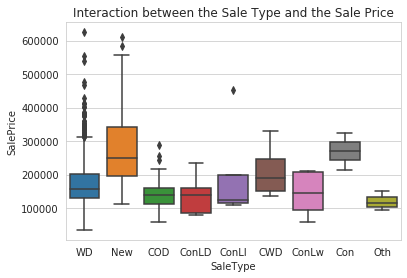

In [130]:
sns.boxplot(train["SaleType"], train["SalePrice"])
plt.title("Interaction between the Sale Type and the Sale Price")

In [131]:
train["SalePrice"].groupby(train["SaleType"]).describe()

,count,mean,std,min,25%,50%,75%,max
SaleType,,,,,,,,
COD,43.0,143973.255814,47098.294314,60000.0,112000.00,139000.0,160500.00,287000.0
CWD,4.0,210600.000000,86421.486526,136000.0,152500.00,188750.0,246850.00,328900.0
Con,2.0,269600.000000,76933.217793,215200.0,242400.00,269600.0,296800.00,324000.0
ConLD,9.0,138780.888889,53876.560647,79900.0,85000.00,140000.0,160000.00,235128.0
ConLI,5.0,200390.000000,145282.519595,110000.0,115000.00,125000.0,200000.00,451950.0
ConLw,5.0,143700.000000,67291.901444,60000.0,95000.00,144000.0,207500.00,212000.0
New,120.0,276654.925000,103224.053365,113000.0,195100.25,248614.0,343232.25,611657.0
Oth,3.0,119850.000000,28441.035495,93500.0,104775.00,116050.0,133025.00,150000.0
WD,1265.0,172490.218972,67383.332660,34900.0,128900.00,158000.0,202500.00,625000.0


Text(0.5, 1.0, 'Interaction between the Sale Condition and the Sale Price')

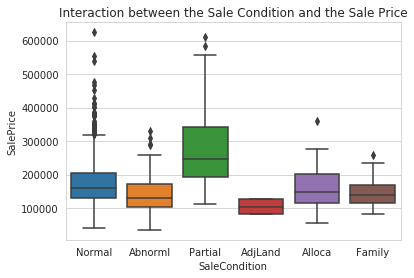

In [132]:
sns.boxplot(train["SaleCondition"], train["SalePrice"])
plt.title("Interaction between the Sale Condition and the Sale Price")